**Object detection using CIFAR-10 dataset**

The CIFAR-10 dataset, readily accessible in Colab, comprises images categorized into ten classes: 'airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', and 'truck'. The dataset consists of a total of 60,000 images, with 50,000 allocated for training and 10,000 for testing. Images is of size 32x32 pixels, each with RGB channels.

In [ ]:
#importing libraries
import numpy as np
import matplotlib.pyplot as plt
from keras.layers import Dense, Flatten
from keras.models import Sequential
from keras.utils import to_categorical
from keras.datasets import cifar10
from tensorflow.keras.preprocessing import image

In [ ]:
#loading the dataset
(X_train, y_train),(X_test, y_test) = cifar10.load_data()

170498071/170498071 [==============================] - 15s 0us/step


In [ ]:
#shapes of training and testing data
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(50000, 32, 32, 3)
(10000, 32, 32, 3)
(50000, 1)
(10000, 1)


<ipython-input-4-1bf5c78bdd1c>:7: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(3,3,i+1)


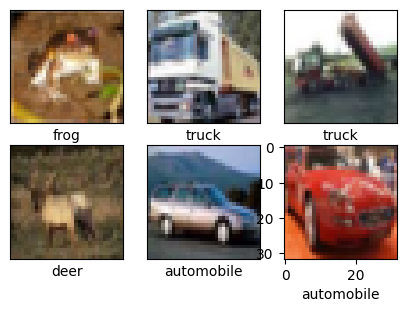

In [ ]:
#displaying some images from the dataset
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
plt.figure(figsize=(5,5))
for i in range(6):
  plt.xticks([])
  plt.yticks([])
  plt.subplot(3,3,i+1)
  plt.imshow(X_train[i])
  plt.xlabel(class_names[y_train[i][0]])

plt.show()

In [ ]:
#normalization
X_train = X_train/255.0
X_test = X_test/255.0

In [ ]:
#building CNN model
from keras.models import Sequential
from keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, Dropout

model= Sequential()
#convolutional layer 1
model.add(Conv2D(64,(3,3), activation="relu", input_shape=(32,32,3)))
#maxpool layer 1
model.add(MaxPooling2D((2,2)))
#dropout layer 1
model.add(Dropout(0.2))
#convolutional layer 2
model.add(Conv2D(128, (3,3), activation = "relu"))
#maxpool layer 2
model.add(MaxPooling2D((2,2)))
#dropout layer 2
model.add(Dropout(0.2))
#flatten layer 1
model.add(Flatten())
#dense layer 1
model.add(Dense(64, activation="relu"))
#dense layer 2
model.add(Dense(10, activation="softmax"))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 64)        1792      
                                                                 
 max_pooling2d (MaxPooling2  (None, 15, 15, 64)        0         
 D)                                                              
                                                                 
 dropout (Dropout)           (None, 15, 15, 64)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 128)       73856     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 6, 6, 128)         0         
 g2D)                                                            
                                                                 
 dropout_1 (Dropout)         (None, 6, 6, 128)         0

In [ ]:
#compilation of the model
model.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=['accuracy'])

In [ ]:
#training of the model
history = model.fit(X_train, y_train, epochs=10, validation_data=(X_test, y_test))

Epoch 1/10
1563/1563 [==============================] - 183s 117ms/step - loss: 0.6216 - accuracy: 0.7802 - val_loss: 0.8257 - val_accuracy: 0.7227
Epoch 2/10
1563/1563 [==============================] - 174s 112ms/step - loss: 0.5984 - accuracy: 0.7887 - val_loss: 0.8264 - val_accuracy: 0.7268
Epoch 3/10
1563/1563 [==============================] - 168s 107ms/step - loss: 0.5739 - accuracy: 0.7968 - val_loss: 0.8122 - val_accuracy: 0.7208
Epoch 4/10
1563/1563 [==============================] - 182s 116ms/step - loss: 0.5580 - accuracy: 0.8023 - val_loss: 0.8196 - val_accuracy: 0.7291
Epoch 5/10
1563/1563 [==============================] - 167s 107ms/step - loss: 0.5371 - accuracy: 0.8105 - val_loss: 0.8380 - val_accuracy: 0.7291
Epoch 6/10
1563/1563 [==============================] - 164s 105ms/step - loss: 0.5184 - accuracy: 0.8132 - val_loss: 0.8407 - val_accuracy: 0.7346
Epoch 7/10
1563/1563 [==============================] - 164s 105ms/step - loss: 0.5032 - accuracy: 0.8189 - val_

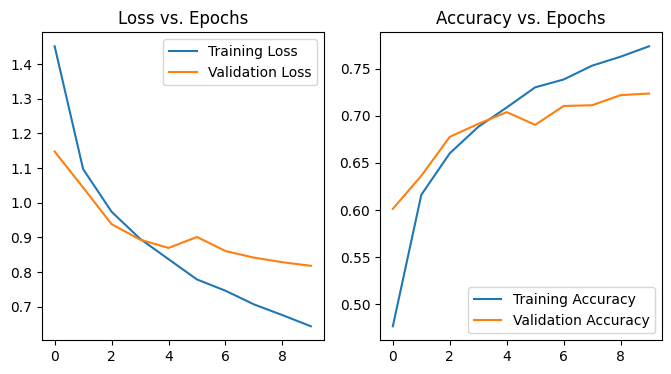

In [ ]:
# Plotting training history

import matplotlib.pyplot as plt
plt.figure(figsize=(8, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history["loss"], label="Training Loss")
plt.plot(history.history["val_loss"], label="Validation Loss")
plt.legend()
plt.title("Loss vs. Epochs")

plt.subplot(1, 2, 2)
plt.plot(history.history["accuracy"], label="Training Accuracy")
plt.plot(history.history["val_accuracy"], label="Validation Accuracy")
plt.legend()
plt.title("Accuracy vs. Epochs")

plt.show()

In [ ]:
# Save the entire model
model.save('/content/drive/MyDrive/CIFAR-10 dataset/cifar.h5')

**Testing the model**

In [ ]:
#function defined for preprocessing the input image
#since the image we want to test may not fit into our model, we need to preprocess it before going for testing
def preprocess_image(img_path):
    img = image.load_img(img_path, target_size=(32, 32))
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension
    img_array /= 255.0  # Normalize to [0, 1]
    return img_array

1/1 [==============================] - 0s 281ms/step


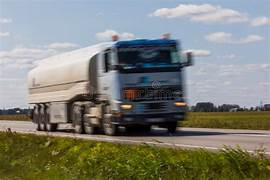

The image is predicted to be a truck


In [ ]:
image_path = '/content/drive/MyDrive/CIFAR-10 dataset/truck.jpg'
preprocessed_image = preprocess_image(image_path)

prediction = model.predict(preprocessed_image)

class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

# Display the input image
from IPython.display import Image, display
display(Image(filename=image_path))

predicted_class = np.argmax(prediction)
print(f"The image is predicted to be a {class_names[predicted_class]}")

1/1 [==============================] - 0s 30ms/step


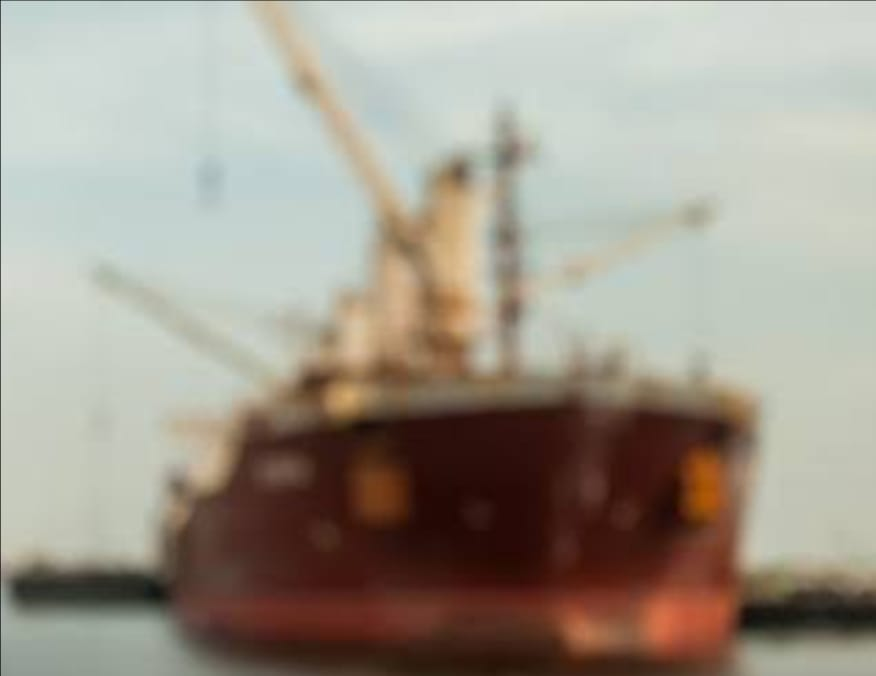

The image is predicted to be a ship


In [ ]:
image_path = '/content/drive/MyDrive/CIFAR-10 dataset/ship.jpg'  # Update with your image path
preprocessed_image = preprocess_image(image_path)

prediction = model.predict(preprocessed_image)

class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

# Display the input image
from IPython.display import Image, display
display(Image(filename=image_path))

predicted_class = np.argmax(prediction)
print(f"The image is predicted to be a {class_names[predicted_class]}")

1/1 [==============================] - 0s 20ms/step


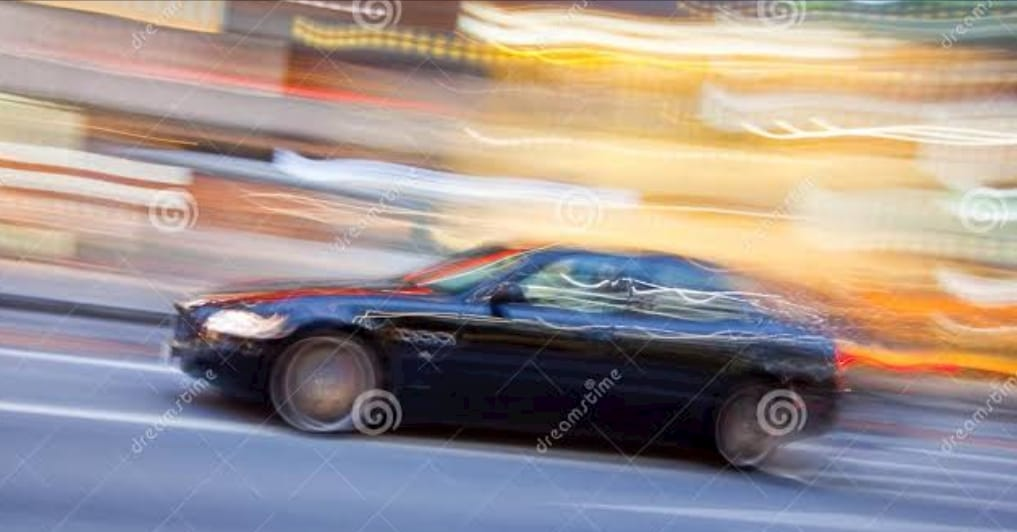

The image is predicted to be a automobile


In [ ]:
image_path = '/content/drive/MyDrive/CIFAR-10 dataset/car.jpg'  # Update with your image path
preprocessed_image = preprocess_image(image_path)

prediction = model.predict(preprocessed_image)

class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

# Display the input image
from IPython.display import Image, display
display(Image(filename=image_path))

predicted_class = np.argmax(prediction)
print(f"The image is predicted to be a {class_names[predicted_class]}")

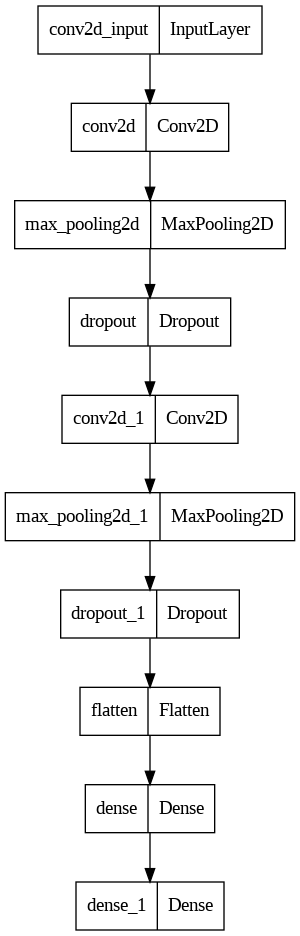

In [ ]:
#layers of the model
from keras.utils import plot_model
plot_model(model)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 64)        1792      
                                                                 
 max_pooling2d (MaxPooling2  (None, 15, 15, 64)        0         
 D)                                                              
                                                                 
 dropout (Dropout)           (None, 15, 15, 64)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 128)       73856     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 6, 6, 128)         0         
 g2D)                                                            
                                                                 
 dropout_1 (Dropout)         (None, 6, 6, 128)         0

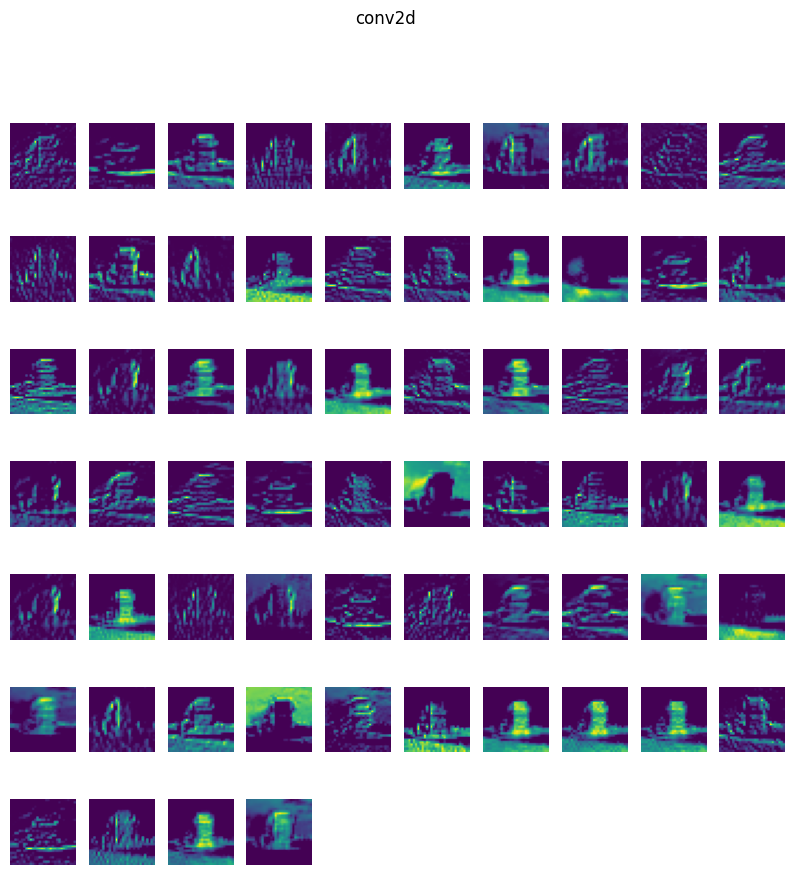

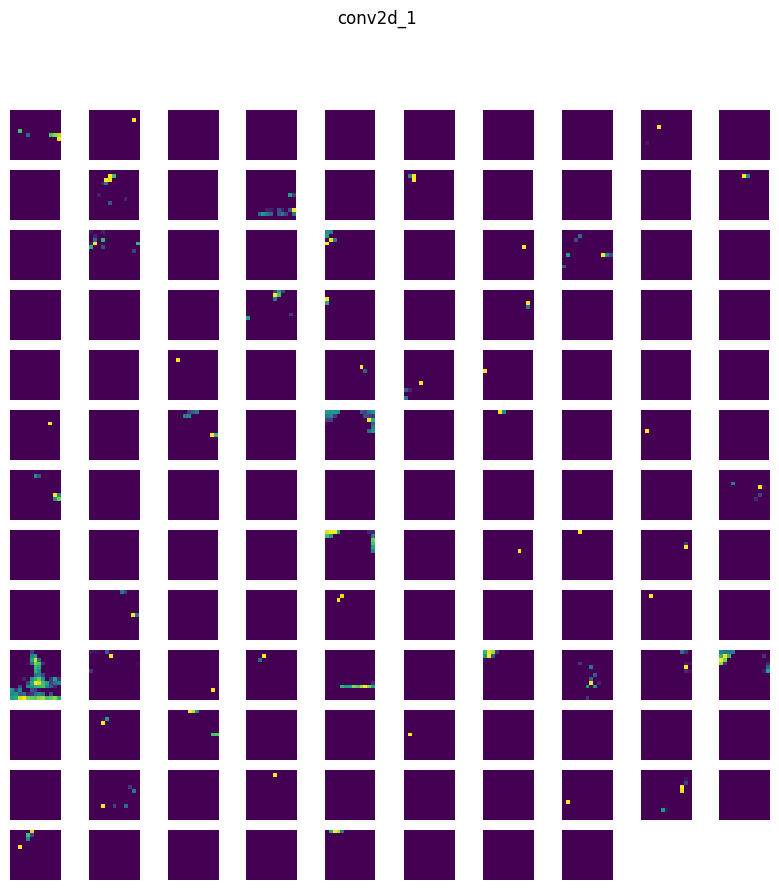

In [ ]:
#feature maps of the model filter-wise

import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.applications.vgg16 import preprocess_input
import matplotlib.pyplot as plt
import numpy as np

# Load your pre-trained model
model = tf.keras.models.load_model('/content/drive/MyDrive/CIFAR-10 dataset/cifar.h5')

# Print the model summary to understand the layers
model.summary()

# Load and preprocess the image from a given path
image_path = '/content/drive/MyDrive/CIFAR-10 dataset/truck.jpg'  # Replace with the path to your input image
image = load_img(image_path, target_size=(32, 32))  # Resize to 32x32, assuming your model was trained on CIFAR-10
image = img_to_array(image)
image = np.expand_dims(image, axis=0)
image = preprocess_input(image)  # Preprocess the image as required by your model

# Get the names of the convolutional layers
layer_names = [layer.name for layer in model.layers if 'conv' in layer.name]

# Create a model that will output the feature maps for each convolutional layer
outputs = [model.get_layer(name).output for name in layer_names]
visualization_model = Model(inputs=model.input, outputs=outputs)

# Get the feature maps for the test image
feature_maps = visualization_model.predict(image)

# Plot the feature maps
for layer_name, feature_map in zip(layer_names, feature_maps):
    num_features = feature_map.shape[-1]
    size = feature_map.shape[1]
    cols = 10
    rows = num_features // cols + 1

    plt.figure(figsize=(10,10))
    plt.suptitle(layer_name)

    for i in range(num_features):
        plt.subplot(rows, cols, i + 1)
        plt.imshow(feature_map[0, :, :, i], cmap='viridis')
        plt.axis('off')

    plt.show()


1/1 [==============================] - 0s 244ms/step


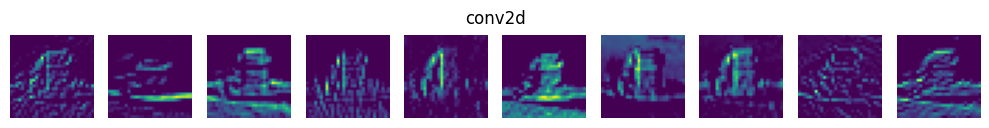

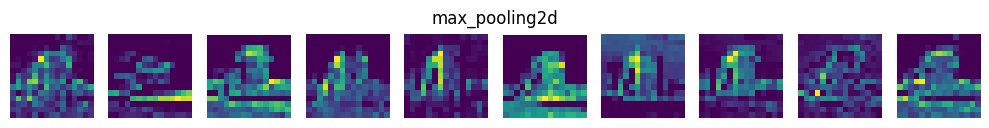

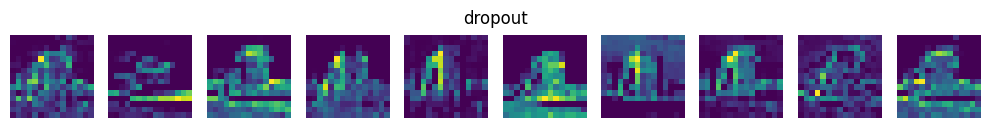

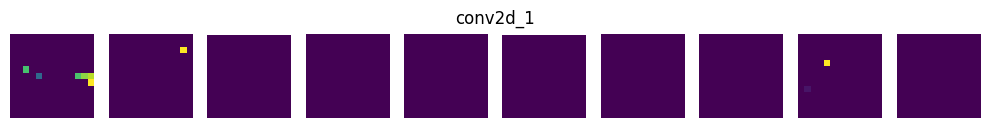

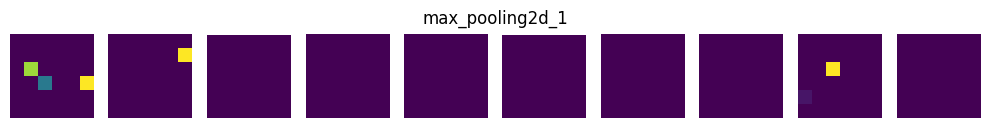

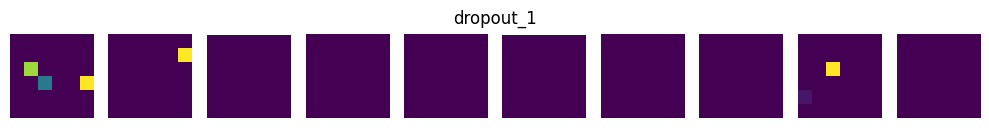

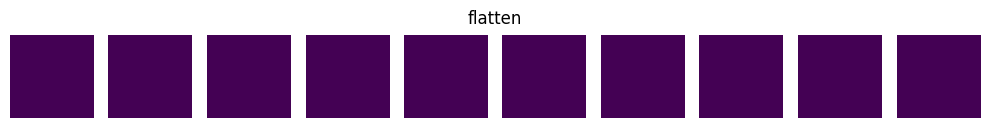

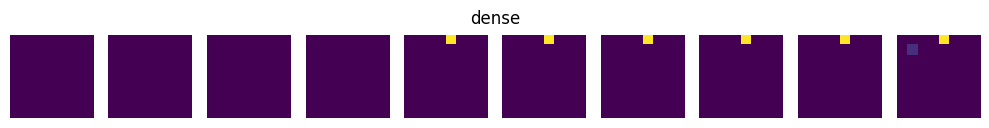

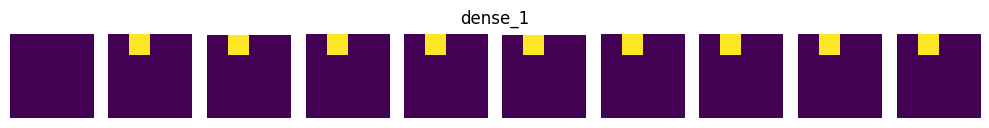

In [ ]:
#feature maps of the truck layer-wise

import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.applications.vgg16 import preprocess_input
import matplotlib.pyplot as plt
import numpy as np

# Load the pre-trained model
model = tf.keras.models.load_model('/content/drive/MyDrive/CIFAR-10 dataset/cifar.h5')

# Preprocess the image
image_path = '/content/drive/MyDrive/CIFAR-10 dataset/truck.jpg'
image = load_img(image_path, target_size=(32, 32))
image = img_to_array(image)
image = np.expand_dims(image, axis=0)
image = preprocess_input(image)

# Get the names of the layers to visualize
layer_names = [layer.name for layer in model.layers]

# Create a model that will output the feature maps for each layer
outputs = [model.get_layer(name).output for name in layer_names]
visualization_model = Model(inputs=model.input, outputs=outputs)

# Get the feature maps for the test image
feature_maps = visualization_model.predict(image)

# Plot the feature maps
for layer_name, feature_map in zip(layer_names, feature_maps):
    if len(feature_map.shape) == 4:  # Convolutional or pooling layer
        num_features = feature_map.shape[-1]
        size = feature_map.shape[1]
        cols = 10
        rows = num_features // cols + 1

        plt.figure(figsize=(10,10))
        plt.suptitle(layer_name, y=0.5)

        for i in range(min(num_features, 10)):
            plt.subplot(1, 10, i + 1)
            plt.imshow(feature_map[0, :, :, i], cmap='viridis')
            plt.axis('off')

        plt.tight_layout(rect=[0, 0, 1, 0.90])
        plt.show()

    elif len(feature_map.shape) == 2:  # Dense or flatten layer
        num_features = feature_map.shape[-1]
        size = int(np.ceil(np.sqrt(num_features)))
        reshaped_feature_map = np.zeros((size, size))

        plt.figure(figsize=(10,10))
        plt.suptitle(layer_name, y=0.5)

        for i in range(10):
            plt.subplot(1, 10, i + 1)
            if i < num_features:
                reshaped_feature_map.flat[i] = feature_map[0, i]
                plt.imshow(reshaped_feature_map, cmap='viridis')
            plt.axis('off')

        plt.tight_layout(rect=[0, 0, 1, 0.90])
        plt.show()


1/1 [==============================] - 0s 280ms/step


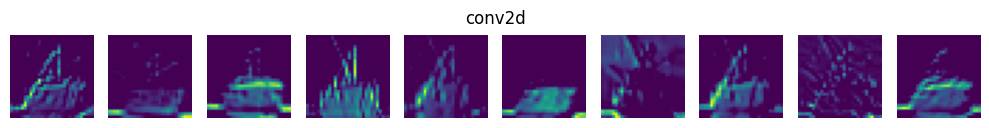

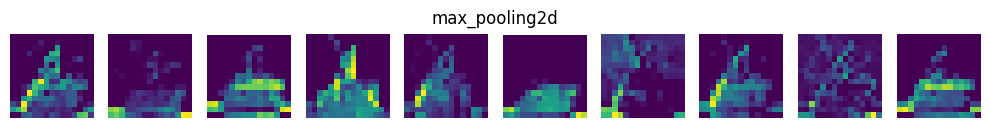

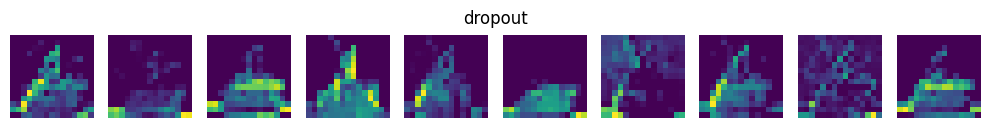

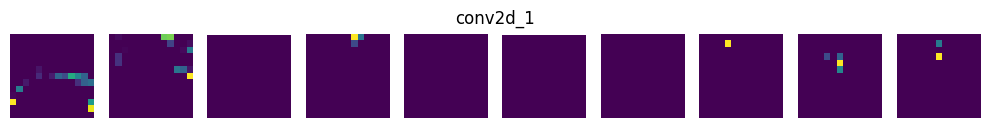

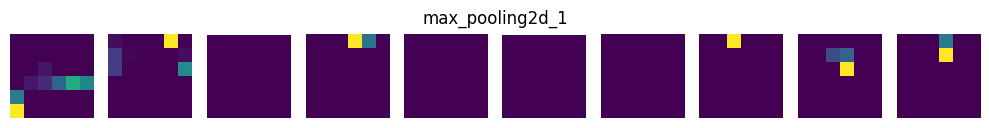

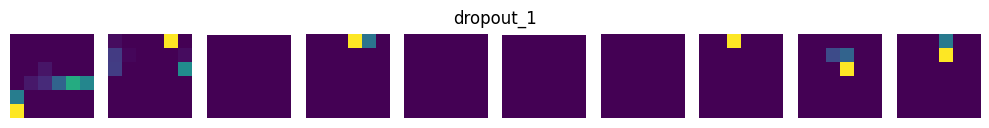

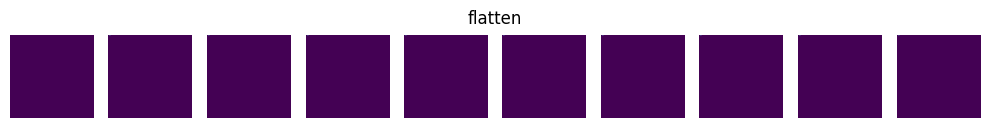

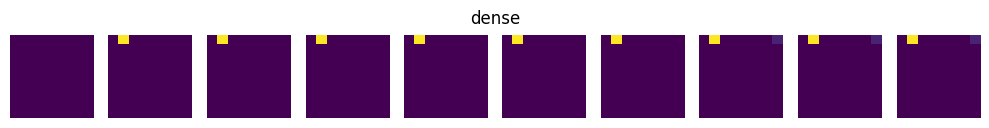

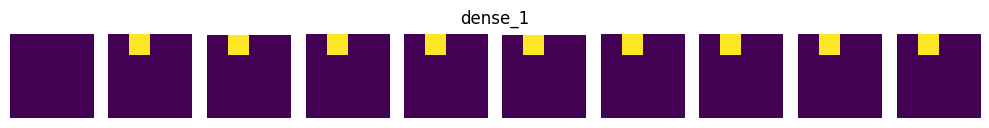

In [ ]:
#feature maps of the ship layer wise

import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.applications.vgg16 import preprocess_input
import matplotlib.pyplot as plt
import numpy as np

# Load the pre-trained model
model = tf.keras.models.load_model('/content/drive/MyDrive/CIFAR-10 dataset/cifar.h5')

# Preprocess the image
image_path = '/content/drive/MyDrive/CIFAR-10 dataset/ship.jpg'
image = load_img(image_path, target_size=(32, 32))
image = img_to_array(image)
image = np.expand_dims(image, axis=0)
image = preprocess_input(image)

# Get the names of the layers to visualize
layer_names = [layer.name for layer in model.layers]

# Create a model that will output the feature maps for each layer
outputs = [model.get_layer(name).output for name in layer_names]
visualization_model = Model(inputs=model.input, outputs=outputs)

# Get the feature maps for the test image
feature_maps = visualization_model.predict(image)

# Plot the feature maps
for layer_name, feature_map in zip(layer_names, feature_maps):
    if len(feature_map.shape) == 4:  # Convolutional or pooling layer
        num_features = feature_map.shape[-1]
        size = feature_map.shape[1]
        cols = 10
        rows = num_features // cols + 1

        plt.figure(figsize=(10,10))
        plt.suptitle(layer_name, y=0.5)

        for i in range(min(num_features, 10)):
            plt.subplot(1, 10, i + 1)
            plt.imshow(feature_map[0, :, :, i], cmap='viridis')
            plt.axis('off')

        plt.tight_layout(rect=[0, 0, 1, 0.90])
        plt.show()

    elif len(feature_map.shape) == 2:  # Dense or flatten layer
        num_features = feature_map.shape[-1]
        size = int(np.ceil(np.sqrt(num_features)))
        reshaped_feature_map = np.zeros((size, size))

        plt.figure(figsize=(10,10))
        plt.suptitle(layer_name, y=0.5)

        for i in range(10):
            plt.subplot(1, 10, i + 1)
            if i < num_features:
                reshaped_feature_map.flat[i] = feature_map[0, i]
                plt.imshow(reshaped_feature_map, cmap='viridis')
            plt.axis('off')

        plt.tight_layout(rect=[0, 0, 1, 0.90])
        plt.show()